In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB14_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB14.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.00000
1,0.002903,0.00000
2,0.005805,0.12500
3,0.008708,0.18750
4,0.011611,0.18750
...,...,...
288,0.986937,0.00000
289,0.989840,0.00625
290,0.993469,0.00000
291,0.996373,0.00000


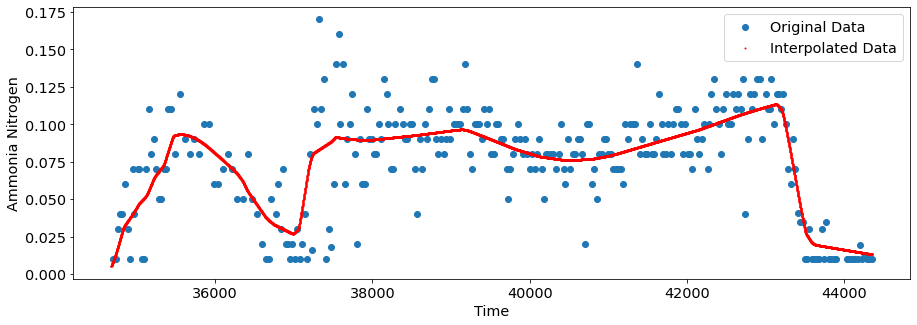

313/313 [==============================] - 0s 346us/step - loss: 5.0970e-16
['loss']


In [3]:
#Transform the normalized scale to real scale
AN_min = 0.01
AN_max = 0.17
time_min = 34708.00    
time_max = 44354.39    

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [4]:
interpolation = model.predict([0.078682322
,0.084798602
,0.091122214
,0.097445827
,0.103769439
,0.110093051
,0.116520329
,0.122636609
,0.128960221
,0.138497473
,0.141607446
,0.147931058
,0.154358336
,0.160474616
,0.166798229
,0.173121841
,0.179445453
,0.185769065
,0.192196343
,0.198416289
,0.211063514
,0.375166432
,0.95569476
,0.958804734
,0.962018373
])
interpolation

array([[0.5105977 ],
       [0.5193761 ],
       [0.52057207],
       [0.5163519 ],
       [0.50901884],
       [0.49946558],
       [0.4865016 ],
       [0.4719221 ],
       [0.45476872],
       [0.42857468],
       [0.42009145],
       [0.4018059 ],
       [0.38275427],
       [0.36455354],
       [0.34024525],
       [0.30693674],
       [0.27066764],
       [0.24141458],
       [0.21220714],
       [0.18402031],
       [0.1452254 ],
       [0.5092525 ],
       [0.04282249],
       [0.04117443],
       [0.0394715 ]], dtype=float32)